In [1]:
#Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Store Dataset

In [3]:
#Load the 'store' dataset
store = pd.read_csv('store.csv')

#Display the first 10 rows of the 'store' dataset
store.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [4]:
#Display the 'store' dataset information
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
#Count the number of missing values of the 'store' dataset
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

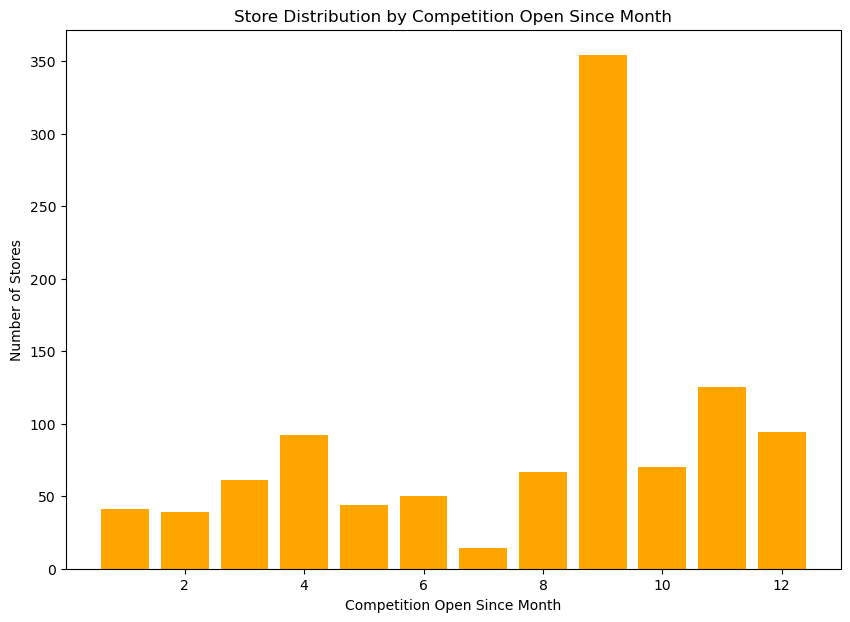

In [6]:
#Plot the distribution of 'CompetitionOpenSinceMonth'
plt.figure(figsize=(10, 7))
plt.bar(store['CompetitionOpenSinceMonth'].unique(),store['CompetitionOpenSinceMonth'].value_counts(dropna = False), color='orange')  # Color can be customized
plt.title("Store Distribution by Competition Open Since Month")
plt.xlabel("Competition Open Since Month")
plt.ylabel("Number of Stores")
plt.show()

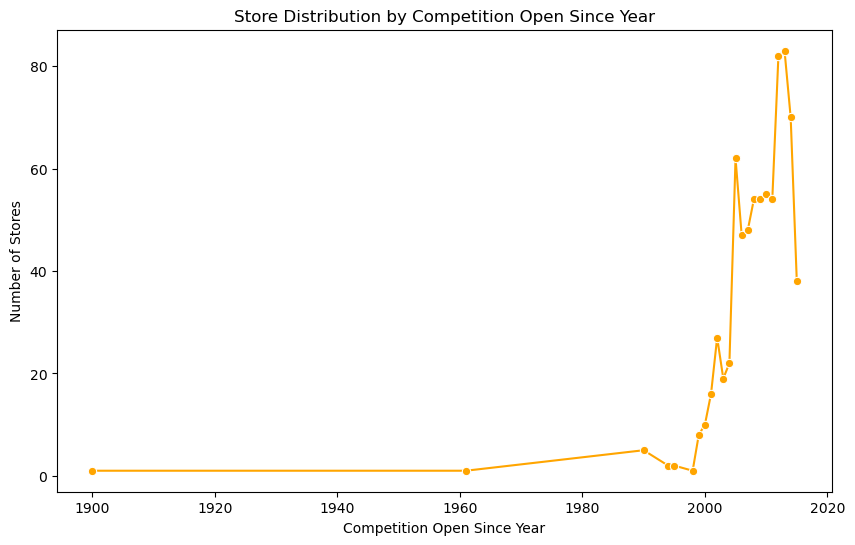

In [7]:
#Plot the distribution of 'CompetitionOpenSinceYear'
plt.figure(figsize=(10, 6))
year_counts = store['CompetitionOpenSinceYear'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='orange')
plt.title("Store Distribution by Competition Open Since Year")
plt.xlabel("Competition Open Since Year")
plt.ylabel("Number of Stores")
plt.grid(False)
plt.show()

In [8]:
#Data Preprocessing

In [9]:
#Handling Missing Values

#Display rows where 'CompetitionDistance' is missing
missing_competition_distance = store[store['CompetitionDistance'].isnull()]
print(missing_competition_distance)
#Drop missing values in `CompetitionDistance` 
store.dropna(subset=['CompetitionDistance'], inplace=True)

#Replace missing Promo2-related columns with 0 or 'None'
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna('None')

#Replace missing values in `CompetitionOpenSinceMonth` columns
# Separate missing values
df_train = store.dropna(subset=['CompetitionOpenSinceMonth'])
df_missing = store[store['CompetitionOpenSinceMonth'].isna()]
#Encode categorical variables
df_train = pd.get_dummies(df_train, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
df_missing = pd.get_dummies(df_missing, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
#Define features and target
features = ['Store', 'CompetitionDistance', 'Promo2',
            'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b',
            'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct',
            'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None']
target = 'CompetitionOpenSinceMonth'
#Align columns
df_missing = df_missing.reindex(columns=df_train.columns, fill_value=0)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)
#Train the Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)
#Predict the missing values
predictions = model.predict(df_missing[features])
#Fill the missing values in the original dataset
store.loc[store['CompetitionOpenSinceMonth'].isna(), 'CompetitionOpenSinceMonth'] = predictions

#Replace missing values in `CompetitionOpenSinceYear` columns
#Separate missing values
df_train2 = store.dropna(subset=['CompetitionOpenSinceYear'])
df_missing2 = store[store['CompetitionOpenSinceYear'].isna()]
#Encode categorical variables
df_train2 = pd.get_dummies(df_train2, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
df_missing2 = pd.get_dummies(df_missing2, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
#Define features and target
features2 = ['Store', 'CompetitionDistance', 'Promo2',
            'Promo2SinceWeek', 'Promo2SinceYear', 'StoreType_b',
            'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'PromoInterval_Jan,Apr,Jul,Oct',
            'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None']
target2 = 'CompetitionOpenSinceYear'
#Align columns
df_missing2 = df_missing2.reindex(columns=df_train2.columns, fill_value=0)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_train2[features2], df_train2[target2], test_size=0.2, random_state=42)
#Train the Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)
#Predict the missing values
predictions = model.predict(df_missing2[features])
#Fill the missing values in the original dataset
store.loc[store['CompetitionOpenSinceYear'].isna(), 'CompetitionOpenSinceYear'] = predictions

#Save the updated `store` dataset
store.to_csv('store_cleaned.csv', index=False)

#Load the new 'store' dataset
store = pd.read_csv('store_cleaned.csv')

     Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov  


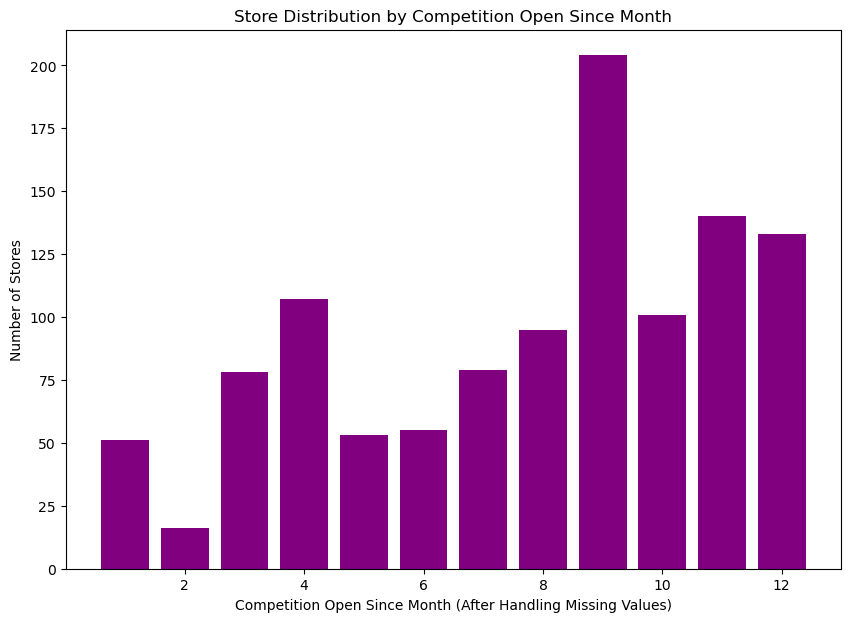

In [10]:
#Plot the distribution of 'CompetitionOpenSinceMonth'
plt.figure(figsize=(10, 7))
plt.bar(store['CompetitionOpenSinceMonth'].unique(),store['CompetitionOpenSinceMonth'].value_counts(dropna = False), color='purple')  # Color can be customized
plt.title("Store Distribution by Competition Open Since Month")
plt.xlabel("Competition Open Since Month (After Handling Missing Values)")
plt.ylabel("Number of Stores")
plt.show()

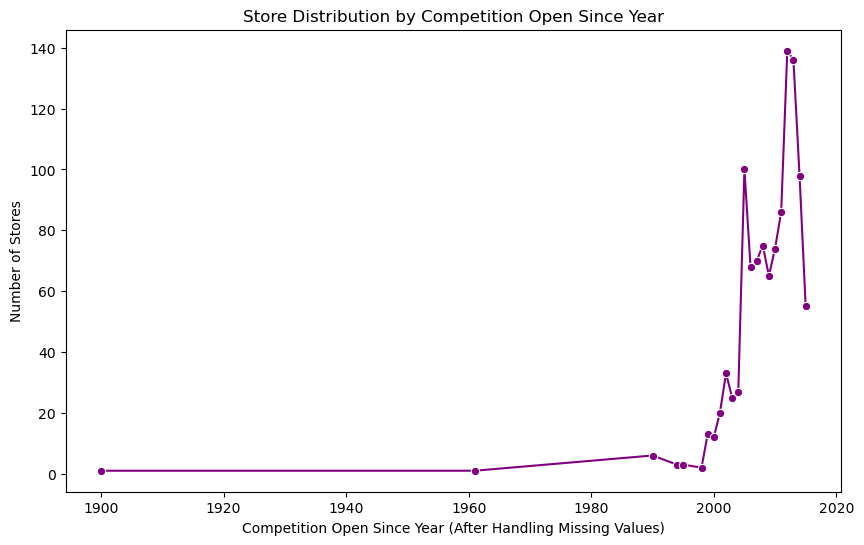

In [11]:
#Plot the distribution of 'CompetitionOpenSinceYear'
plt.figure(figsize=(10, 6))
year_counts = store['CompetitionOpenSinceYear'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple')
plt.title("Store Distribution by Competition Open Since Year")
plt.xlabel("Competition Open Since Year (After Handling Missing Values)")
plt.ylabel("Number of Stores")
plt.grid(False)
plt.show()

In [12]:
#Data Transformation

#Initialize LabelEncoder
label_encoder = LabelEncoder()

#Transform 'StoreType' and 'Assortment' into numeric codes
store['StoreType'] = label_encoder.fit_transform(store['StoreType'])
store['Assortment'] = label_encoder.fit_transform(store['Assortment'])

#Transform 'PromoInterval' into numeric codes
store['PromoInterval'] = label_encoder.fit_transform(store['PromoInterval'].astype(str))

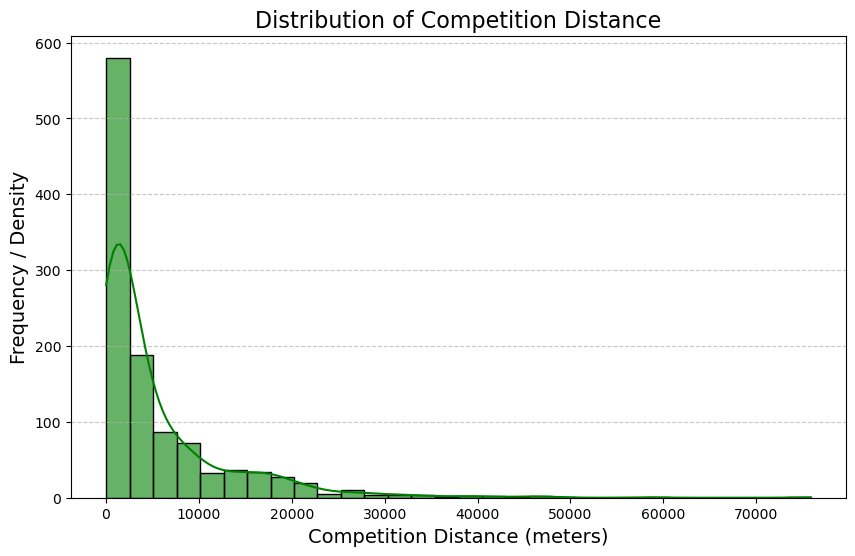

In [13]:
#Plot a histogram KDE
plt.figure(figsize=(10, 6))
sns.histplot(store['CompetitionDistance'], kde=True, bins=30, color='green', edgecolor='black', alpha=0.6)
plt.title('Distribution of Competition Distance', fontsize=16)
plt.xlabel('Competition Distance (meters)', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
#Train Dataset

In [15]:
#Load the 'train' dataset
train = pd.read_csv('train.csv')

#Display the first 10 rows of the 'train' dataset
train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1
5,6,5,31/07/2015,5651,589,1,1,0,1
6,7,5,31/07/2015,15344,1414,1,1,0,1
7,8,5,31/07/2015,8492,833,1,1,0,1
8,9,5,31/07/2015,8565,687,1,1,0,1
9,10,5,31/07/2015,7185,681,1,1,0,1


In [16]:
#Display the 'train' dataset information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [17]:
#Count the number of missing values of the 'train' dataset
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [18]:
#Data Preprocessing

In [19]:
#Data Transformation

#Transform 'StateHoliday' into numeric codes
train['StateHoliday'] = label_encoder.fit_transform(train['StateHoliday'].astype(str))

#Convert 'Date' to datetime
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['WeekOfYear'] = train['Date'].dt.isocalendar().week
train['Day'] = train['Date'].dt.day

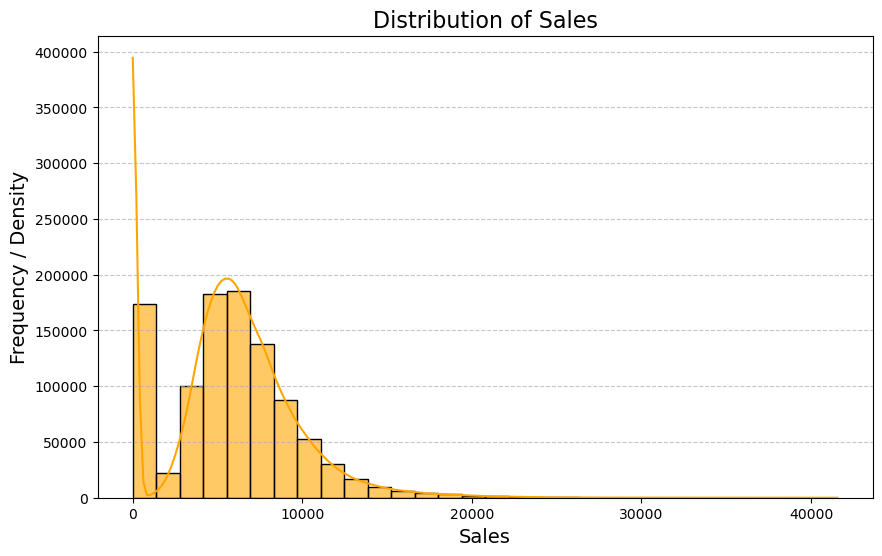

In [20]:
#Plot a histogram KDE
plt.figure(figsize=(10, 6))
sns.histplot(train['Sales'], kde=True, color='orange', bins=30, edgecolor='black', alpha=0.6)
plt.title('Distribution of Sales', fontsize=16)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
#Test Dataset

In [22]:
#Load the 'test' dataset
test = pd.read_csv('test.csv')

#Display the first 10 rows of the 'test' dataset
test.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0
5,10,4,17/09/2015,NaN,NaN,1.0,1,0,0
6,11,4,17/09/2015,NaN,NaN,1.0,1,0,0
7,12,4,17/09/2015,NaN,NaN,1.0,1,0,0
8,13,4,17/09/2015,NaN,NaN,1.0,1,0,0
9,14,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [23]:
#Display the 'test' dataset information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [24]:
#Count the number of missing values in each column of the 'test' dataset
test.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [25]:
#Data Preprocessing

In [26]:
#Handling Missing Values

#Drop missing values in 'open' 
test.dropna(subset=['Open'], inplace=True)

In [27]:
#Data Transformation

#Transform 'StateHoliday' into numeric codes
test['StateHoliday'] = label_encoder.fit_transform(test['StateHoliday'].astype(str))

#Convert 'Date' to datetime
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['WeekOfYear'] = test['Date'].dt.isocalendar().week
test['Day'] = test['Date'].dt.day

In [28]:
#Dropping 'Customers' Column from 'test' dataset

#Drop 'customers' column
test = test.drop(columns=['Customers'])

In [29]:
#Save the updated 'test' dataset
test.to_csv('test_cleaned.csv', index=False)

#Load the new 'test' dataset
test = pd.read_csv('test_cleaned.csv')

In [30]:
#Dropping 'Customers' Column from 'train' dataset

#Drop 'customers' column
train = train.drop(columns = ['Customers'])

In [31]:
#Save the updated 'train' dataset
train.to_csv('train_cleaned.csv', index=False)

#Load the new 'train' dataset
train = pd.read_csv('train_cleaned.csv')

In [32]:
#Merging Datasets

In [33]:
#Merge 'train' and 'store' datasets
data = pd.merge(store, train, on='Store')

#Save the `data` dataset
data.to_csv('data.csv', index=False)

#Load the 'data' dataset
data = pd.read_csv('data.csv')

In [34]:
#Merge 'test' and 'store' datasets
test2 = pd.merge(store, test, on='Store')

#Save the 'test2' dataset
test2.to_csv('test2.csv', index=False)

#Load the 'test2' dataset
test2 = pd.read_csv('test2.csv')

In [35]:
#Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Convert 'Date' to datetime
test2['Date'] = pd.to_datetime(test2['Date'])

In [36]:
#Display the first 10 rows of the 'data' dataset
data.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,WeekOfYear,Day
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-31,5263,1,1,0,1,2015,7,31,31
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-30,5020,1,1,0,1,2015,7,31,30
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-29,4782,1,1,0,1,2015,7,31,29
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-28,5011,1,1,0,1,2015,7,31,28
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-27,6102,1,1,0,1,2015,7,31,27
5,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-26,0,0,0,0,0,2015,7,30,26
6,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-25,4364,1,0,0,0,2015,7,30,25
7,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-24,3706,1,0,0,0,2015,7,30,24
8,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-23,3769,1,0,0,0,2015,7,30,23
9,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-07-22,3464,1,0,0,0,2015,7,30,22


In [37]:
#Display the first 10 rows of the 'test2' dataset
test2.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,WeekOfYear,Day
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-17,NaN,1.0,1,0,0,2015,9,38,17
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-16,NaN,1.0,1,0,0,2015,9,38,16
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-15,NaN,1.0,1,0,0,2015,9,38,15
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-14,NaN,1.0,1,0,0,2015,9,38,14
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-13,NaN,0.0,0,0,0,2015,9,37,13
5,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-12,NaN,1.0,0,0,0,2015,9,37,12
6,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-11,NaN,1.0,0,0,0,2015,9,37,11
7,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-10,NaN,1.0,0,0,0,2015,9,37,10
8,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-09,NaN,1.0,0,0,0,2015,9,37,9
9,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,3,...,2015-09-08,NaN,1.0,0,0,0,2015,9,37,8


In [38]:
#EDA

In [39]:
#Calculate correlations
correlations = data.corr()

#Extract correlation values with 'Sales' and sort them
sales_corr = correlations['Sales'].sort_values(ascending=False)

#Convert it into a DataFrame for a more presentable table
sales_corr_table = sales_corr.reset_index()
sales_corr_table.columns = ['Feature', 'Correlation with Sales']

#Display the table
print(sales_corr_table)

                      Feature  Correlation with Sales
0                       Sales                1.000000
1                        Open                0.678637
2                       Promo                0.452315
3               SchoolHoliday                0.085071
4               PromoInterval                0.079432
5                  Assortment                0.075382
6                  WeekOfYear                0.052809
7                       Month                0.048628
8                        Date                0.041871
9                        Year                0.023537
10   CompetitionOpenSinceYear                0.017371
11                      Store                0.005932
12                        Day               -0.011608
13  CompetitionOpenSinceMonth               -0.012648
14                  StoreType               -0.013149
15        CompetitionDistance               -0.019229
16            Promo2SinceWeek               -0.044682
17                     Promo

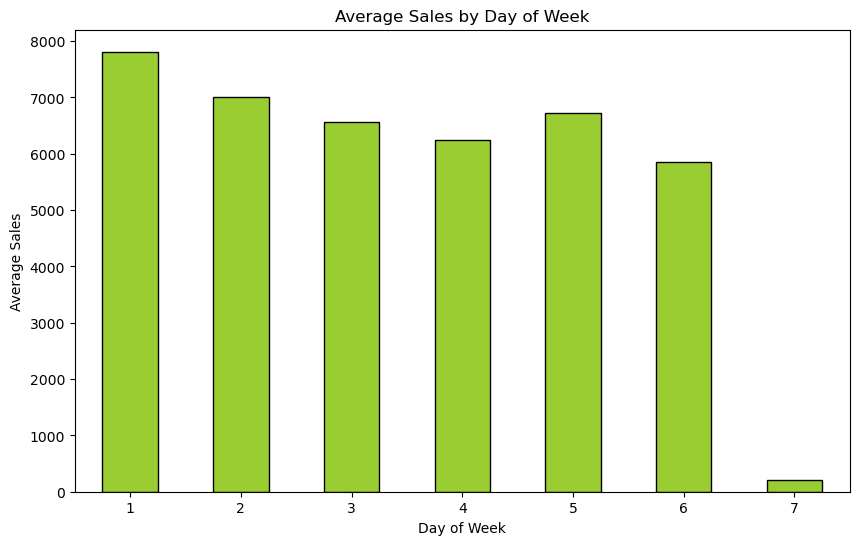

In [40]:
#Average Sales by DayOfWeek
sales_by_day = data.groupby('DayOfWeek')['Sales'].mean()
#Bar chart
sales_by_day.plot(kind='bar', color='yellowgreen', edgecolor='black', figsize=(10, 6))
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

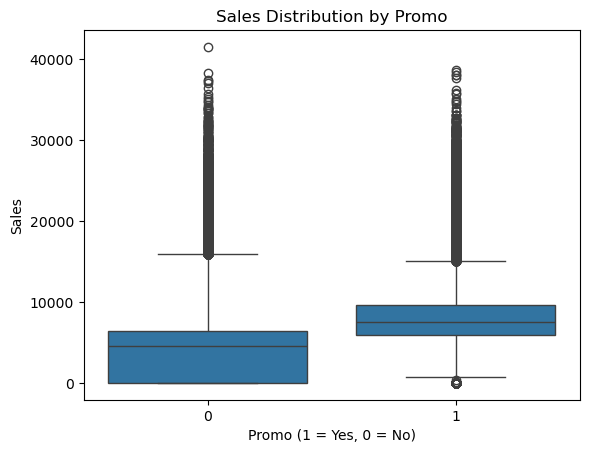

In [41]:
#Boxplot
sns.boxplot(x='Promo', y='Sales', data=data)
plt.title('Sales Distribution by Promo')
plt.xlabel('Promo (1 = Yes, 0 = No)')
plt.ylabel('Sales')
plt.show()

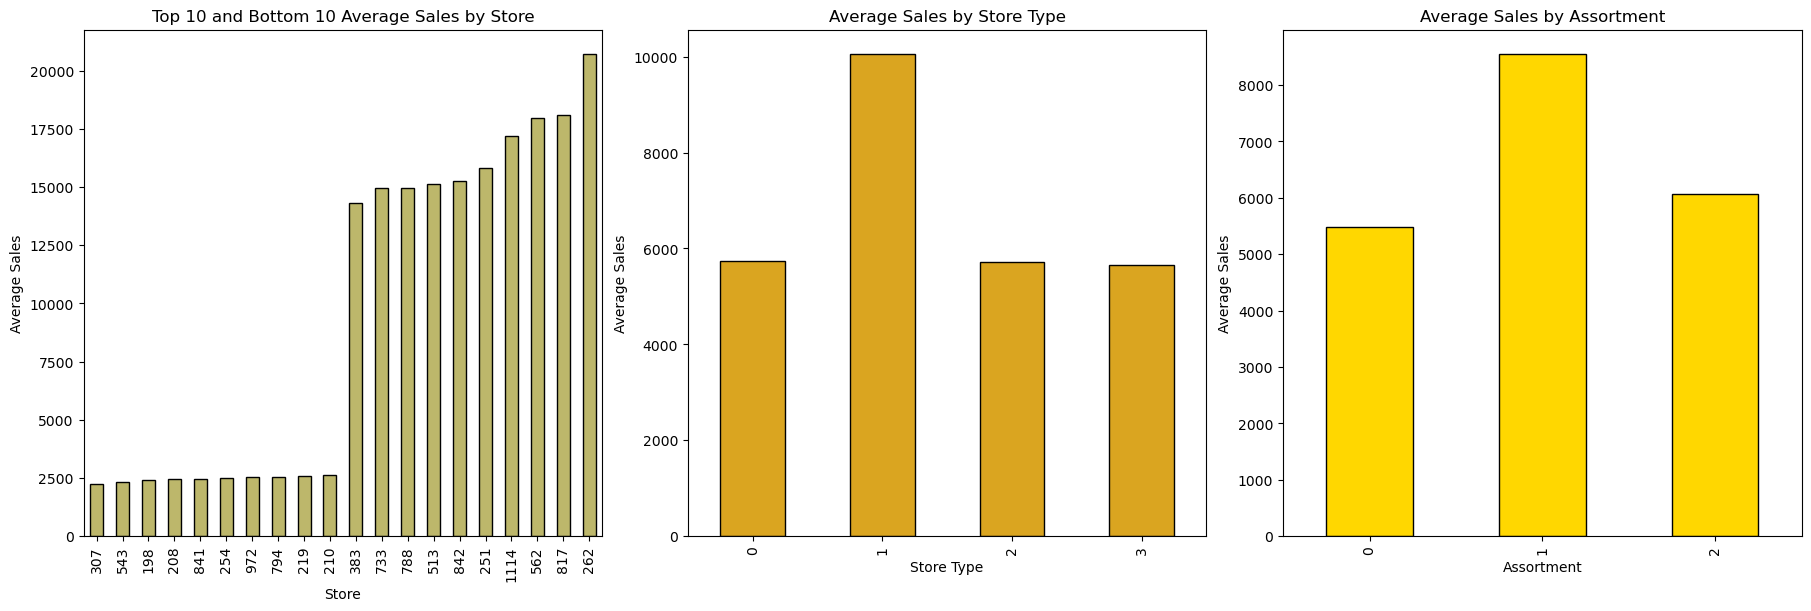

In [42]:
#Set up the figure for 3 plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

#Plot 1
store_sales = data.groupby('Store')['Sales'].mean().sort_values()
top_10_sales = store_sales.tail(10)  # Top 10 stores
bottom_10_sales = store_sales.head(10)  # Bottom 10 stores
top_bottom_sales = pd.concat([bottom_10_sales, top_10_sales])
top_bottom_sales.plot(
    kind='bar', 
    ax=axes[0], 
    title='Top 10 and Bottom 10 Average Sales by Store', 
    color='darkkhaki', 
    edgecolor='black'
)
axes[0].set_xlabel('Store')
axes[0].set_ylabel('Average Sales')

#Plot 2
storetype_sales = data.groupby('StoreType')['Sales'].mean()
storetype_sales.plot(
    kind='bar', 
    ax=axes[1], 
    title='Average Sales by Store Type', 
    color='goldenrod', 
    edgecolor='black'
)
axes[1].set_xlabel('Store Type')
axes[1].set_ylabel('Average Sales')

#Plot 3
assortment_sales = data.groupby('Assortment')['Sales'].mean()
assortment_sales.plot(
    kind='bar', 
    ax=axes[2], 
    title='Average Sales by Assortment', 
    color='gold', 
    edgecolor='black'
)
axes[2].set_xlabel('Assortment')
axes[2].set_ylabel('Average Sales')

#Display the plots
plt.show()

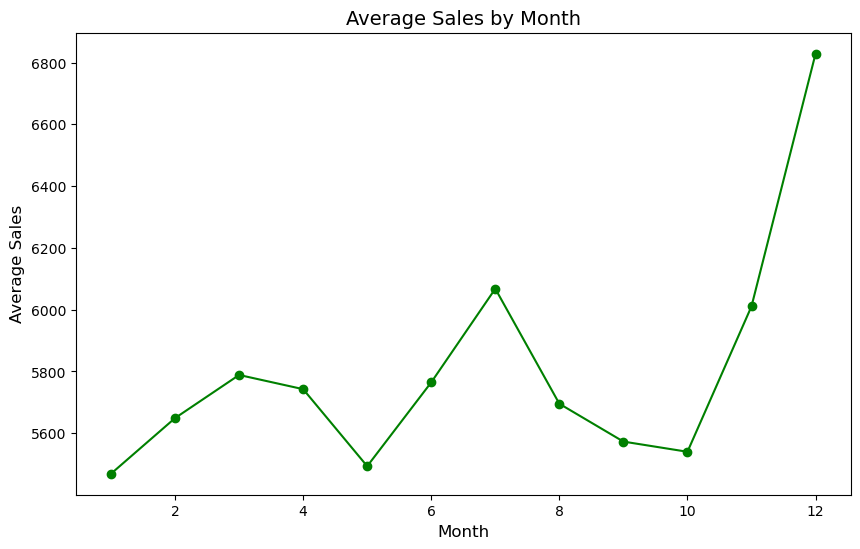

In [43]:
#Calculate average sales by month
avg_sales_by_month = data.groupby('Month')['Sales'].mean()

#line chart
avg_sales_by_month.plot(kind='line', marker='o', color='green', figsize=(10, 6))
plt.title('Average Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

#Display the plot
plt.show()


In [44]:
#Model Training

In [45]:
X = data.drop(columns=['Sales','Date'])
y = data['Sales']

#Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Make prediction and evaluation
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 813.62


In [46]:
# Calculate RMSE for the training dataset
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"Training RMSE: {train_rmse:.2f}")

Training RMSE: 304.34


In [47]:
from sklearn.metrics import r2_score

# Calculate R2 for training set
r2_train = r2_score(y_train, y_train_pred)
print(f"Training R2: {r2_train:.2f}")

# Calculate R2 for validation set
r2_val = r2_score(y_val, y_pred)
print(f"Validation R2: {r2_val:.2f}")


Training R2: 0.99
Validation R2: 0.96


In [48]:
#Display Feature Importance
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
for idx in sorted_indices[:10]:  # Top 10 features
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

Open: 0.4605
CompetitionDistance: 0.1068
Store: 0.0913
Promo: 0.0733
CompetitionOpenSinceYear: 0.0453
CompetitionOpenSinceMonth: 0.0411
DayOfWeek: 0.0393
Day: 0.0259
WeekOfYear: 0.0223
Promo2SinceYear: 0.0173


In [49]:
#'test2' dataset
#Ensure the columns in test2 match those used in training
X_test = test2[X_train.columns] 

#Make predictions
y_test_pred = model.predict(X_test)

#Add predictions to the 'test2' dataset
test2['Predicted_Sales'] = y_test_pred

# Save predictions
test2[['Predicted_Sales']].to_csv('test2_predictions.csv', index=False)

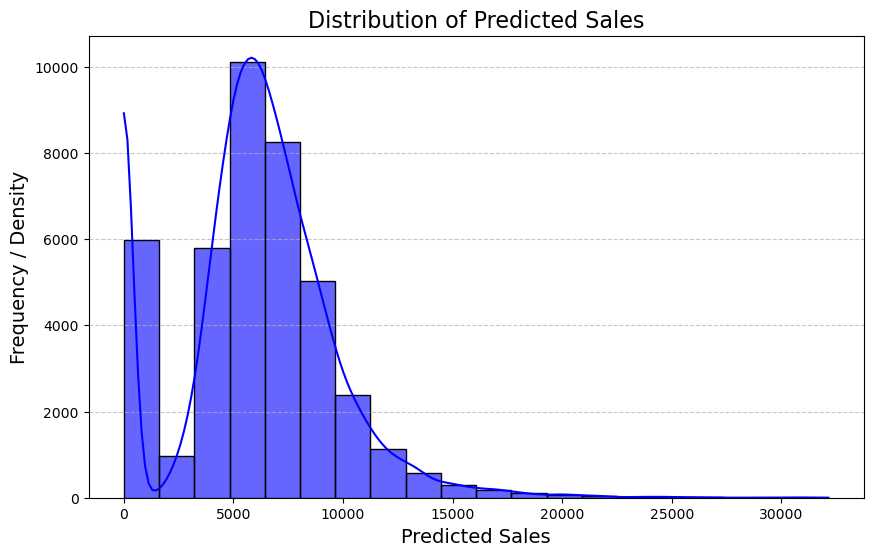

In [50]:
#Plot a histogram KDE
plt.figure(figsize=(10, 6))
sns.histplot(test2['Predicted_Sales'], kde=True, bins=20, color='blue', edgecolor='black', alpha=0.6)
plt.title('Distribution of Predicted Sales', fontsize=16)
plt.xlabel('Predicted Sales', fontsize=14)
plt.ylabel('Frequency / Density', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()